# Credit One Customer Default - Pipeline - Allick

### The objective of this project is to answer the following questions:

#### Task 1 
* 1a) They need a much better way to understand how much credit to allow someone to use or, at the very least, if someone should be approved or not.
* 1b) Define the process that you will follow to thoroughly analyze the data found in the Credit One dataset. You will choose a framework, to perform a quick examination of the Credit One data.

#### Task 2
* Problem:
1. Increase in customer default rates - This is bad for Credit One since we approve the customers for loans in the first place.
2. Revenue and customer loss for clients and, eventually, loss of clients for Credit One

* Investigative Questions:
1. How do you ensure that customers can/will pay their loans? Can we do this?

* As you progress through the tasks at hand begin thinking about how to solve this problem. Here are some lessons we learned form a similar problem we addressed last year:
1. We cannot control customer spending habits
2. We cannot always go from what we find in our analysis to the underlying "why"
3. We must on the problem(s) we can solve: What attributes in the data can we deem to be statistically significant to the problem at hand?
4. What concrete information can we derive from the data we have?
5. What proven methods can we use to uncover more information and why?

# Import packages

In [1]:
pip install --upgrade scikit-learn==0.23.2

Requirement already up-to-date: scikit-learn==0.23.2 in c:\users\kltho\anaconda3\envs\c2t1test\lib\site-packages (0.23.2)
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install -U scikit-learn scipy statsmodels

Requirement already up-to-date: scikit-learn in c:\users\kltho\anaconda3\envs\c2t1test\lib\site-packages (0.23.2)
Requirement already up-to-date: scipy in c:\users\kltho\anaconda3\envs\c2t1test\lib\site-packages (1.5.2)
Requirement already up-to-date: statsmodels in c:\users\kltho\anaconda3\envs\c2t1test\lib\site-packages (0.12.0)
Note: you may need to restart the kernel to use updated packages.


In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mlp
import seaborn as sns
import pandas_profiling


#Helpers
%matplotlib inline

from sqlalchemy import create_engine
import pymysql
import plotly.graph_objects as go


#importing libraries
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import r2_score, accuracy_score, make_scorer, confusion_matrix, roc_auc_score,roc_curve, recall_score
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
import warnings
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
warnings.simplefilter(action='ignore', category=(UserWarning,RuntimeWarning))
from IPython.display import Image 
from sklearn.tree import export_graphviz
from io import StringIO
from six.moves.cPickle import loads
from sklearn import svm
import graphviz
from sklearn.linear_model import LinearRegression, LogisticRegression    
from scipy.special import logsumexp
    
clf=LinearRegression()   #creating LinearRegression Classifier


#Float Formatting
pd.options.display.float_format = '{:,.2f}'.format


# Import data

In [4]:
data = pd.read_csv('C:/Users/kltho/OneDrive/Documents/C2T1/default of credit card clients.csv')
print(data.shape)

(30000, 26)


## Evaluate data

In [5]:
data.dtypes

Unnamed: 0                    int64
ID                            int64
LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
dtype: object

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Unnamed: 0                  30000 non-null  int64
 1   ID                          30000 non-null  int64
 2   LIMIT_BAL                   30000 non-null  int64
 3   SEX                         30000 non-null  int64
 4   EDUCATION                   30000 non-null  int64
 5   MARRIAGE                    30000 non-null  int64
 6   AGE                         30000 non-null  int64
 7   PAY_0                       30000 non-null  int64
 8   PAY_2                       30000 non-null  int64
 9   PAY_3                       30000 non-null  int64
 10  PAY_4                       30000 non-null  int64
 11  PAY_5                       30000 non-null  int64
 12  PAY_6                       30000 non-null  int64
 13  BILL_AMT1                   30000 non-null  int64
 14  BILL_A

In [7]:
data.head()

,Unnamed: 0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,1,20000,2,2,1,24,2,2,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,2,120000,2,2,2,26,-1,2,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,3,90000,2,2,2,34,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,4,50000,2,2,1,37,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,5,50000,1,2,1,57,-1,0,-1,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


## Preprocess

In [8]:
import sys
print(sys.executable)

C:\Users\kltho\Anaconda3\envs\c2t1TEST\python.exe


In [9]:
data.sort_values(by='AGE', ascending=False)

,Unnamed: 0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
18245,18246,18246,440000,1,1,1,79,0,0,0,...,447112,438187,447543,15715,16519,16513,15800,16531,15677,0
25136,25137,25137,180000,1,1,1,75,1,-2,-2,...,0,0,0,0,0,0,0,0,0,1
246,247,247,250000,2,2,1,75,0,-1,-1,...,1010,5572,794,1631,1536,1010,5572,794,1184,0
25141,25142,25142,210000,1,2,1,75,0,0,0,...,203776,205901,210006,9700,8810,9000,7300,7500,7600,0
29175,29176,29176,160000,2,3,1,74,0,0,0,...,16905,0,19789,3783,2268,16905,0,19789,26442,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8490,8491,8491,10000,1,3,2,21,0,0,2,...,6154,6280,0,2400,0,0,126,0,0,0
18342,18343,18343,20000,2,2,2,21,1,2,2,...,14255,14138,16138,1327,0,2000,283,2000,859,0
18344,18345,18345,20000,2,1,2,21,0,0,-1,...,0,7273,6490,2000,647,489,7273,130,0,0
15728,15729,15729,50000,2,1,2,21,0,0,0,...,22365,12702,4134,5143,5000,1021,0,3000,0,0


In [10]:
data.head()

,Unnamed: 0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,1,20000,2,2,1,24,2,2,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,2,120000,2,2,2,26,-1,2,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,3,90000,2,2,2,34,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,4,50000,2,2,1,37,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,5,50000,1,2,1,57,-1,0,-1,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [11]:
print(data.shape)

(30000, 26)


In [12]:
data = data.replace([' ','?'], np.nan)

In [13]:
data.duplicated().any()

False

In [14]:
print(data[data.duplicated()].shape)
data[data.duplicated()]

(0, 26)


,Unnamed: 0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month


In [15]:
data = data.drop_duplicates()
data.duplicated().any()

False

In [16]:
data.isnull().any()
data.isnull().sum()

Unnamed: 0                    0
ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [17]:
data.head()

,Unnamed: 0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,1,20000,2,2,1,24,2,2,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,2,120000,2,2,2,26,-1,2,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,3,90000,2,2,2,34,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,4,50000,2,2,1,37,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,5,50000,1,2,1,57,-1,0,-1,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [18]:
#features
credit = data.iloc[:, 1:]
print('Summary of feature sample')
credit.head()

Summary of feature sample


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


## EDA
### Statistical Analysis

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 0 to 29999
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Unnamed: 0                  30000 non-null  int64
 1   ID                          30000 non-null  int64
 2   LIMIT_BAL                   30000 non-null  int64
 3   SEX                         30000 non-null  int64
 4   EDUCATION                   30000 non-null  int64
 5   MARRIAGE                    30000 non-null  int64
 6   AGE                         30000 non-null  int64
 7   PAY_0                       30000 non-null  int64
 8   PAY_2                       30000 non-null  int64
 9   PAY_3                       30000 non-null  int64
 10  PAY_4                       30000 non-null  int64
 11  PAY_5                       30000 non-null  int64
 12  PAY_6                       30000 non-null  int64
 13  BILL_AMT1                   30000 non-null  int64
 14  BILL_A

### Categorical variables

In [20]:
#Convert dtypes from 'object' to 'category'
data['SEX'] = data['SEX'].astype('category')
data['EDUCATION'] = data['EDUCATION'].astype('category')

In [21]:
#Then change from categorical to numerical datatypes and store in a different column
data = data.assign(SEX_ID = data['SEX'].cat.codes)
data = data.assign(EDUCATION_ID = data['EDUCATION'].cat.codes)

EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown)

In [22]:
# Categorical variables description
data[['SEX_ID', 'EDUCATION_ID', 'MARRIAGE']].describe()

,SEX_ID,EDUCATION_ID,MARRIAGE
count,"30,000.00","30,000.00","30,000.00"
mean,0.60,1.85,1.55
std,0.49,0.79,0.52
min,0.00,0.00,0.00
25%,0.00,1.00,1.00
50%,1.00,2.00,2.00
75%,1.00,2.00,2.00
max,1.00,6.00,3.00


In [23]:
# Payment delay description (each number representing payments past due)
# Pay_0 must represent 'Duly Payed' (payed on time)
data[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].describe()

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,"30,000.00","30,000.00","30,000.00","30,000.00","30,000.00","30,000.00"
mean,-0.02,-0.13,-0.17,-0.22,-0.27,-0.29
std,1.12,1.20,1.20,1.17,1.13,1.15
min,-2.00,-2.00,-2.00,-2.00,-2.00,-2.00
25%,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00
50%,0.00,0.00,0.00,0.00,0.00,0.00
75%,0.00,0.00,0.00,0.00,0.00,0.00
max,8.00,8.00,8.00,8.00,8.00,8.00


In [24]:
def cat_univariate_eda(data, cat_col_names, n_cols = 3, figsize = None, save_fig = False):
    
    # univariate eda for categorical features
    n_rows = len(cat_col_names)/n_cols
    
    plt.figure(figsize=(5*n_cols,5*n_rows))
    
    if figsize:
        plt.figure(figsize=figsize)
    
    for i in range(0,len(cat_col_names)):
        plt.subplot(n_rows+1, n_cols, (i+1))
        sns.countplot(data[cat_col_names[i]])
    
    if save_fig:
        plt.savefig('./cat_col_eda1.png')
    
    plt.show()
    
    
def num_univariate_eda(data, num_col_names, n_cols = 4, figsize = None, save_fig = False):
    
    # univariate eda for numerical features
    n_rows = len(num_col_names)/n_cols
    
    plt.figure(figsize=(5*n_cols,5*n_rows))
    
    if figsize:
        plt.figure(figsize=figsize)
    
    for i in range(0,len(num_col_names)):
        plt.subplot(n_rows+1, n_cols, (i+1))
        sns.distplot(data[num_col_names[i]].dropna(), kde=True)
        #sns.boxplot(y=data[num_col_names[i]].dropna())
    
    
    if save_fig:
        plt.savefig('./num_col_eda.png')
    plt.show()

### Analysis of Features

In [25]:
# Bill Statement statistics
data[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,"30,000.00","30,000.00","30,000.00","30,000.00","30,000.00","30,000.00"
mean,"51,223.33","49,179.08","47,013.15","43,262.95","40,311.40","38,871.76"
std,"73,635.86","71,173.77","69,349.39","64,332.86","60,797.16","59,554.11"
min,"-165,580.00","-69,777.00","-157,264.00","-170,000.00","-81,334.00","-339,603.00"
25%,"3,558.75","2,984.75","2,666.25","2,326.75","1,763.00","1,256.00"
50%,"22,381.50","21,200.00","20,088.50","19,052.00","18,104.50","17,071.00"
75%,"67,091.00","64,006.25","60,164.75","54,506.00","50,190.50","49,198.25"
max,"964,511.00","983,931.00","1,664,089.00","891,586.00","927,171.00","961,664.00"


What do negative amounts mean? Credit to account? Will need to look at closer.

In [26]:
#Previous Payment Description
data[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].describe()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,"30,000.00","30,000.00","30,000.00","30,000.00","30,000.00","30,000.00"
mean,"5,663.58","5,921.16","5,225.68","4,826.08","4,799.39","5,215.50"
std,"16,563.28","23,040.87","17,606.96","15,666.16","15,278.31","17,777.47"
min,0.00,0.00,0.00,0.00,0.00,0.00
25%,"1,000.00",833.00,390.00,296.00,252.50,117.75
50%,"2,100.00","2,009.00","1,800.00","1,500.00","1,500.00","1,500.00"
75%,"5,006.00","5,000.00","4,505.00","4,013.25","4,031.50","4,000.00"
max,"873,552.00","1,684,259.00","896,040.00","621,000.00","426,529.00","528,666.00"


Payment Status Details PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)

In [27]:
data.LIMIT_BAL.describe()

count      30,000.00
mean      167,484.32
std       129,747.66
min        10,000.00
25%        50,000.00
50%       140,000.00
75%       240,000.00
max     1,000,000.00
Name: LIMIT_BAL, dtype: float64

In [28]:
#Rename feature 'default payment next month' and change value '0' to represent first payment
data = data.rename(columns={'default payment next month': 'def_pay', 
                        'PAY_0': 'PAY_1'})
data.head()

,Unnamed: 0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay,SEX_ID,EDUCATION_ID
0,1,1,20000,2,2,1,24,2,2,-1,...,0,0,689,0,0,0,0,1,1,2
1,2,2,120000,2,2,2,26,-1,2,0,...,3261,0,1000,1000,1000,0,2000,1,1,2
2,3,3,90000,2,2,2,34,0,0,0,...,15549,1518,1500,1000,1000,1000,5000,0,1,2
3,4,4,50000,2,2,1,37,0,0,0,...,29547,2000,2019,1200,1100,1069,1000,0,1,2
4,5,5,50000,1,2,1,57,-1,0,-1,...,19131,2000,36681,10000,9000,689,679,0,0,2


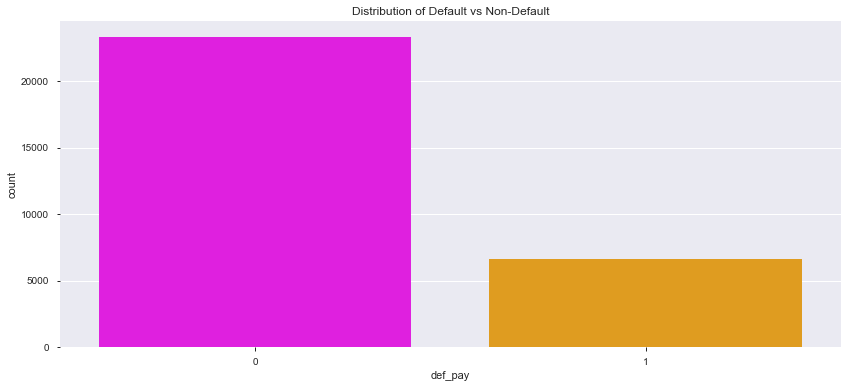

In [29]:
#Visualization of Default Payments
#Default payment (1=yes, 0=no)

from matplotlib import pyplot
a4_dims = (14, 6)
fig, ax = pyplot.subplots(figsize=a4_dims)
plt.title("Distribution of Default vs Non-Default")
sns.countplot(data['def_pay'],ax=ax, palette=['magenta','orange'])

In [30]:
#Inition calculation of the default probability
data.def_pay.sum() / len(data.def_pay)

0.2212

SEX: Gender (1=male, 2=female)

In [31]:
#What is the gender breakdown?
data.SEX.value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

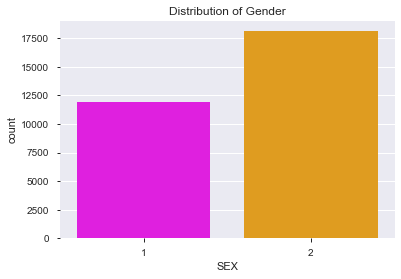

In [32]:
plt.title("Distribution of Gender")
sns.countplot(x='SEX',data=data,palette=['magenta','orange']);

MARRIAGE: Marital status (1=married, 2=single, 3=others) *0 likely falls into the "other" category so we'll address that later.

In [33]:
#What is the breakdown marital of status?
data['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

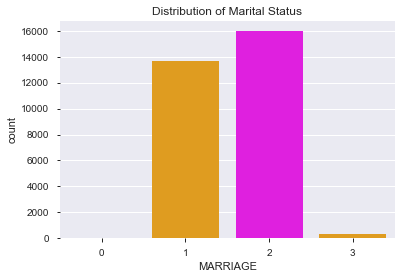

In [34]:
plt.title("Distribution of Marital Status")
sns.countplot(x='MARRIAGE',data=data,palette=['magenta','orange']);

EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

In [35]:
#OOB analysis
data.EDUCATION.value_counts() 

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

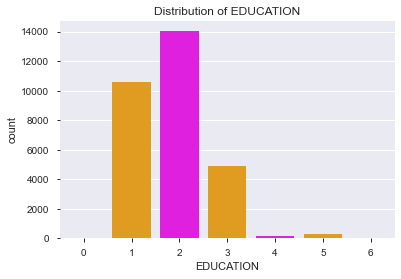

In [36]:
plt.title("Distribution of EDUCATION")
sns.countplot(x='EDUCATION',data=data,palette=['magenta','orange']);

## Further Exploration of Features

#### Helper Methods :

In [95]:
line, = ax.plot([1, 2, 3], label='Inline label')
ax.legend()

Percentage of {} is {:.2%}


AttributeError: 'NoneType' object has no attribute 'format'

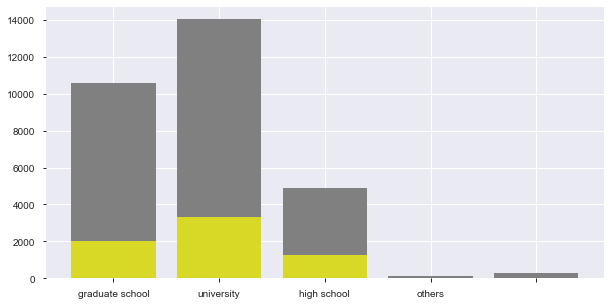

In [96]:
#EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
# preparing the vairable for the diagram
_EDUCATION_RANGE= [1,2,3,4,5]
plt.figure(figsize=(10,5))

graduate_school= data['EDUCATION'][data['EDUCATION']==1].count()
graduate_school_default = data['EDUCATION'][(data['EDUCATION']==1)&(data['def_pay'])].count()

university= data['EDUCATION'][data['EDUCATION']==2].count()
university_default = data['EDUCATION'][(data['EDUCATION']==2)&(data['def_pay'])].count()

high_school= data['EDUCATION'][data['EDUCATION']==3].count()
high_school_default = data['EDUCATION'][(data['EDUCATION']==3)&(data['def_pay'])].count()

others= data['EDUCATION'][data['EDUCATION']==4].count()
others_default = data['EDUCATION'][(data['EDUCATION']==4)&(data['def_pay'])].count()

unknown= data['EDUCATION'][data['EDUCATION']==5].count()
unknown_default = data['EDUCATION'][(data['EDUCATION']==5)&(data['def_pay'])].count()

education_total = [graduate_school,university,high_school,others,unknown]
default_education_total=  [graduate_school_default,university_default,high_school_default,others_default,unknown_default] 


plt.bar(_EDUCATION_RANGE , education_total,color='grey')
plt.bar(_EDUCATION_RANGE , default_education_total,color='yellow', alpha = 0.7)
plt.xticks(_EDUCATION_RANGE,['graduate school','university','high school','others'])
calculate_percentage(graduate_school,graduate_school_default,"Graduate school Default")
calculate_percentage(university,university_default,"University Default")
calculate_percentage(high_school,high_school_default,"High school Default")
calculate_percentage(others,others_default,"Others Default")
calculate_percentage(unknown,unknown_default,"Unknown Default")


plt.legend()
plt.show()

## Correlation of Coefficient of Variables

In [37]:
# listing different types of features for filtering
pay = ['PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
bill = ['BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
paid = ['PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
time_series = bill + paid + ['LIMIT_BAL']

cat_features = ['SEX','EDUCATION','MARRIAGE','AGE']  +pay #+ ['LIMIT_BAL']
num_features = sorted(list(set(data.columns)-set(cat_features)-set(['def_pay'])))

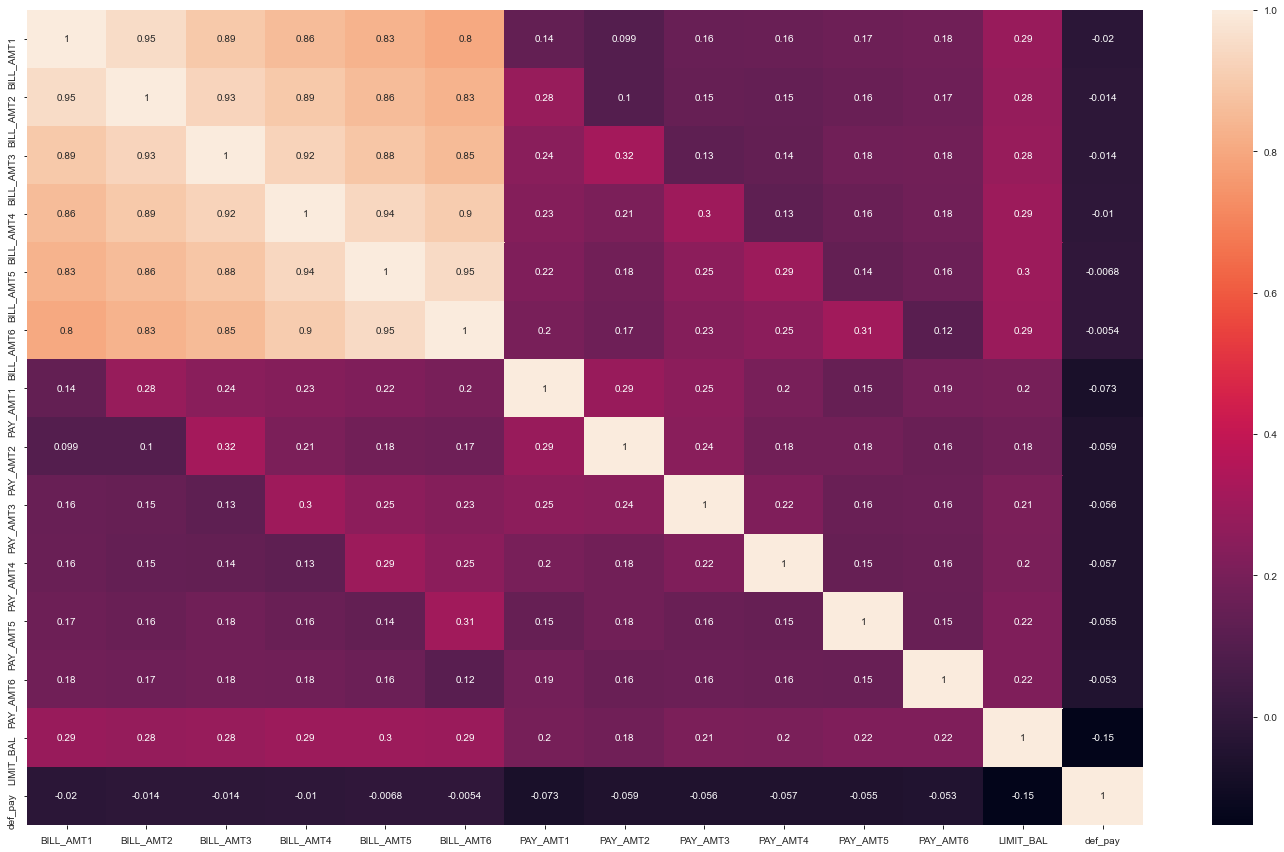

In [38]:
# correlation matrix for numerical features
num = bill+paid+['LIMIT_BAL']+['def_pay']
plt.figure(figsize=(25,15))
sns.heatmap(data[num].corr(method='pearson'),annot=True)

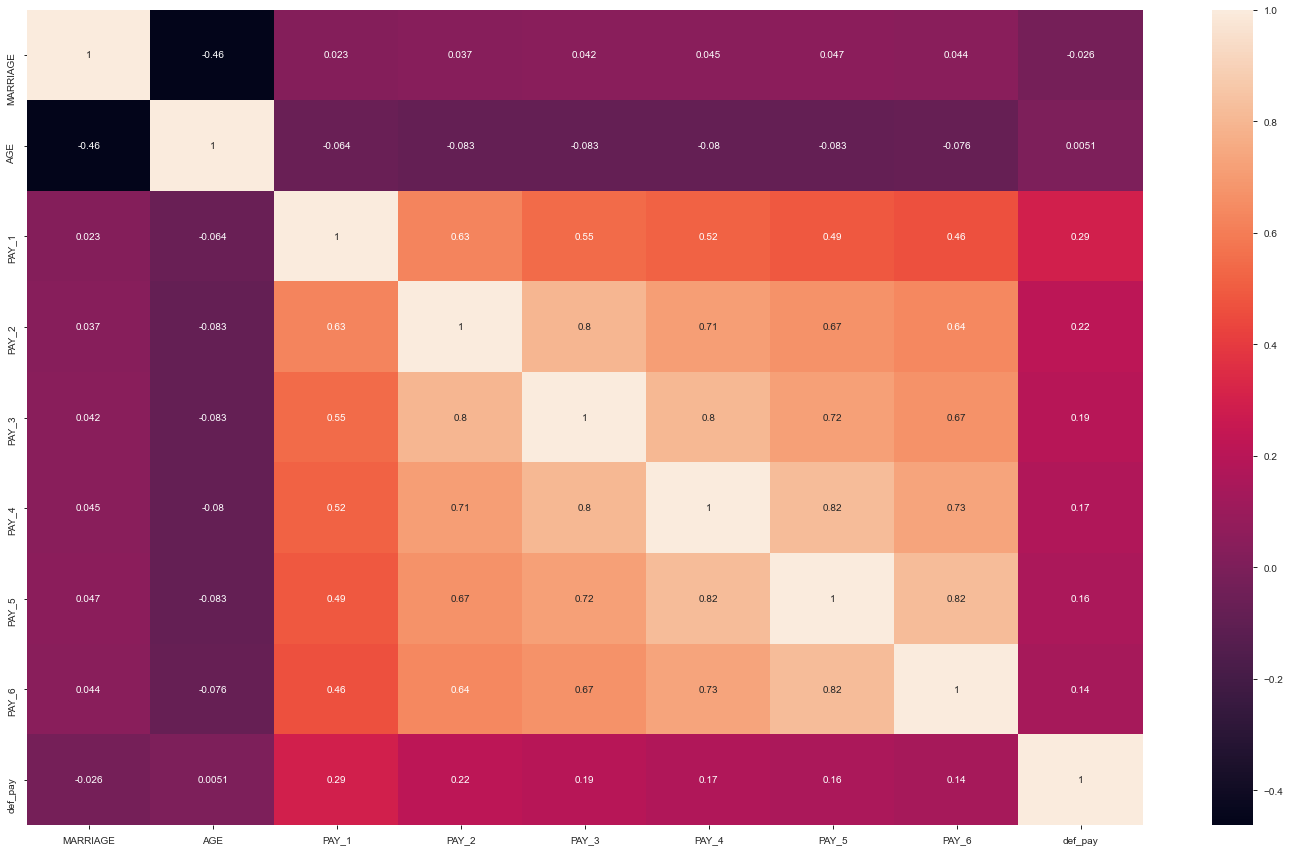

In [39]:
# correlation matrix for numerical features
cat = cat_features+['def_pay']
plt.figure(figsize=(25,15))
sns.heatmap(data[cat].corr(method='spearman'),annot=True)

I don't see any significant correlation between AGE, or MARRIAGE and payment/default

## Initial ML before Feature Engineering

### Decision Tree

In [40]:
# create the target variable
Y = data['def_pay'].copy()
Y.sample(5)

4784     1
19246    0
2572     0
1506     0
27274    0
Name: def_pay, dtype: int64

In [41]:
# Feature creation using the original df.
features = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
X = data[features].copy()
X.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

In [42]:
# Train and test df using an 75/25 split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)
# this means we will train on 75% of the data and test on the remaining 25%.

In [43]:
# Check to make sure the split looks correct
#check that the target is not far off
print(data.def_pay.describe())
print("---------------------------")
print(Y_train.describe())
print("---------------------------")
print(Y_test.describe())

count   30,000.00
mean         0.22
std          0.42
min          0.00
25%          0.00
50%          0.00
75%          0.00
max          1.00
Name: def_pay, dtype: float64
---------------------------
count   22,500.00
mean         0.22
std          0.42
min          0.00
25%          0.00
50%          0.00
75%          0.00
max          1.00
Name: def_pay, dtype: float64
---------------------------
count   7,500.00
mean        0.22
std         0.41
min         0.00
25%         0.00
50%         0.00
75%         0.00
max         1.00
Name: def_pay, dtype: float64


In [44]:
#create the classifier
classifier = DecisionTreeClassifier(max_depth=5, random_state=12) 
# training the classifier
classifier.fit(X_train, Y_train)
# do our predictions on the test
predictions = classifier.predict(X_test)
# see how good we did on the test
accuracy_score(y_true = Y_test, y_pred = predictions)

0.8193333333333334

Now let's see if we can eek out a better fitting model, and consequently a slightly better accuracy score?

### Cross Validation

In [45]:
from sklearn.model_selection import GridSearchCV

In [46]:
# define the parameters grid
param_grid = {'max_depth': np.arange(3, 10),
             'criterion' : ['gini','entropy'],
             'max_leaf_nodes': [5,10,20,100],
             'min_samples_split': [2, 5, 10, 20]}

# create the grid
grid_tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 5, scoring= 'accuracy')

#training
grid_tree.fit(X_train, Y_train)
#let's see the best estimator
print(grid_tree.best_estimator_)
#with its score
print(np.abs(grid_tree.best_score_))

DecisionTreeClassifier(max_depth=3, max_leaf_nodes=10)
0.8206222222222221


In [47]:
classifier = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=20,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=20,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
classifier.fit(X_train, Y_train)
predictions = classifier.predict(X_test)
accuracy_score(y_true = Y_test, y_pred = predictions)

C:\Users\kltho\Anaconda3\envs\c2t1TEST\lib\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "


0.8205333333333333

In [48]:
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model

In [49]:
model = linear_model.LinearRegression()
X = data[features]
Y = data['def_pay']

predicted = cross_val_predict(model, X, Y, cv=6)

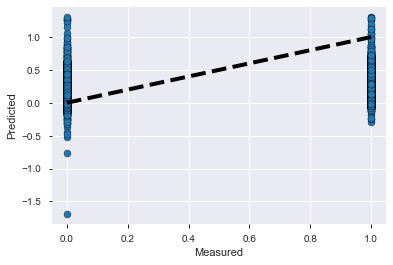

In [50]:
fig, ax = plt.subplots()
ax.scatter(Y, predicted, edgecolors=(0, 0, 0))
ax.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

Let's get an idea of feature importance before visualizing a Decision Tree.

In [70]:
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier
parameters = {'n_estimators':[5,10,15,20], 'learning_rate':[0.3, 0.5,0.75,1]}
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=0)
adaboost = AdaBoostClassifier(random_state=41)
clf = GridSearchCV(adaboost, parameters)
clf.fit(X_train, Y_train)
clf.score(X_test,Y_test)
clf.best_params_

{'learning_rate': 0.5, 'n_estimators': 10}

Feature: PAY_1 is overwhelmingly more "important" in this example. 
Going to test this feature in the DT

In [52]:
X = data[['PAY_1']].copy()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)
classifier.fit(X_train, Y_train) #same classifier as before
predictions = classifier.predict(X_test)
accuracy_score(y_true = Y_test, y_pred = predictions)

C:\Users\kltho\Anaconda3\envs\c2t1TEST\lib\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "


0.8196

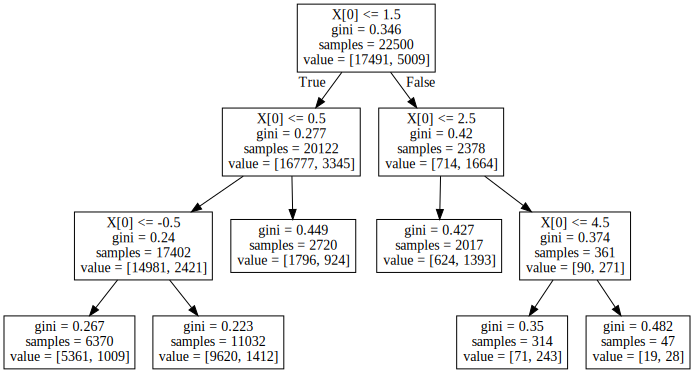

In [53]:
from sklearn import tree
import graphviz
dot_data = tree.export_graphviz(classifier, out_file=None)  
graph = graphviz.Source(dot_data)  
graph

Will cross reference accuracy using the f1-score, which takes into account the false positives, the false negatives etc.
So we define the precision as TP/(TP+FP) and recall as TP/(TP+FN) and we have F1 = 2 (Prec Rec) / (Prec + Rec)

In [54]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer
scoring = {'accuracy': make_scorer(accuracy_score),
          'prec': 'precision'}

In [55]:
#recreate the model and evaluate it
X = data[['PAY_1']].copy()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)
classifier.fit(X_train, Y_train) #same classifier as before
predictions = classifier.predict(X_test)
f1_score(y_true = Y_test, y_pred = predictions)

C:\Users\kltho\Anaconda3\envs\c2t1TEST\lib\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "


0.4312736443883985

In [56]:
# True Positive (TP): we predict a label of 1 (positive), and the true label is 1.
TP = np.sum(np.logical_and(predictions == 1, Y_test == 1))
 
# True Negative (TN): we predict a label of 0 (negative), and the true label is 0.
TN = np.sum(np.logical_and(predictions == 0, Y_test == 0))
 
# False Positive (FP): we predict a label of 1 (positive), but the true label is 0.
FP = np.sum(np.logical_and(predictions == 1, Y_test == 0))
 
# False Negative (FN): we predict a label of 0 (negative), but the true label is 1.
FN = np.sum(np.logical_and(predictions == 0, Y_test == 1))
 
print('TP: {}, FP: {}, TN: {}, FN: {}'.format(TP,FP,TN,FN))

TP: 513, FP: 239, TN: 5634, FN: 1114


In [57]:
#Trying other classifier modeling to see if we can get more accurate results

In [58]:
param_grid = {'max_depth': np.arange(3, 10),
             'criterion' : ['gini','entropy'],
             'max_leaf_nodes': [5,10,20,100],
             'min_samples_split': [2, 5, 10, 20]}
grid_tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 5, scoring= 'f1')
grid_tree.fit(X_train, Y_train)
best = grid_tree.best_estimator_
print(grid_tree.best_estimator_)
print(np.abs(grid_tree.best_score_))
classifier = best
classifier.fit(X_train, Y_train)
predictions = classifier.predict(X_test)
print("-------------")
print(f1_score(y_true = Y_test, y_pred = predictions))
print(get_feature_importance(classifier, features))
print("-------------")
TP = np.sum(np.logical_and(predictions == 1, Y_test == 1))
TN = np.sum(np.logical_and(predictions == 0, Y_test == 0))
FP = np.sum(np.logical_and(predictions == 1, Y_test == 0))
FN = np.sum(np.logical_and(predictions == 0, Y_test == 1))
print('TP: {}, FP: {}, TN: {}, FN: {}'.format(TP,FP,TN,FN))

DecisionTreeClassifier(max_depth=3, max_leaf_nodes=5)
0.45043898640418956
-------------
0.4312736443883985


NameError: name 'get_feature_importance' is not defined

In [ ]:
param_grid = {'max_depth': np.arange(3, 10),
             'criterion' : ['gini','entropy'],
             'max_leaf_nodes': [5,10,20,100],
             'min_samples_split': [2, 5, 10, 20],
             'class_weight' : ['balanced']}
grid_tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 5, scoring= 'f1')
grid_tree.fit(X_train, Y_train)
best = grid_tree.best_estimator_
print(grid_tree.best_estimator_)
print(np.abs(grid_tree.best_score_))
classifier = best
classifier.fit(X_train, Y_train)
predictions = classifier.predict(X_test)
print("-------------")
print(f1_score(y_true = Y_test, y_pred = predictions))
print(get_feature_importance(classifier, features))
print("-------------")
TP = np.sum(np.logical_and(predictions == 1, Y_test == 1))
TN = np.sum(np.logical_and(predictions == 0, Y_test == 0))
FP = np.sum(np.logical_and(predictions == 1, Y_test == 0))
FN = np.sum(np.logical_and(predictions == 0, Y_test == 1))
print('TP: {}, FP: {}, TN: {}, FN: {}'.format(TP,FP,TN,FN))

Last test was much better, but the amount of false positives and false negatives seems a bit alarming. That being said, this is OOB data that will likely perform a little better once feature engineering takes place.